In [1]:
# Import your libraries:

import numpy as np 
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.datasets import load_diabetes

pd.set_option('display.max_columns', None)

import warnings 
warnings.filterwarnings('ignore') 

pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
data = pd.read_csv('king_ country_ houses_aa.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [4]:
df = data.copy()

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df = df.drop(columns=['id', 'date', 'lat', 'long'])

In [7]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.eq(" ").sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21607.00,540106.71,367171.02,75000.00,321725.00,450000.00,645000.00,7700000.00
bedrooms,21607.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21607.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21607.00,2079.95,918.53,290.00,1428.50,1910.00,2550.00,13540.00
sqft_lot,21607.00,15110.19,41425.79,520.00,5040.00,7620.00,10692.00,1651359.00
floors,21607.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21607.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21607.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21607.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21607.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00


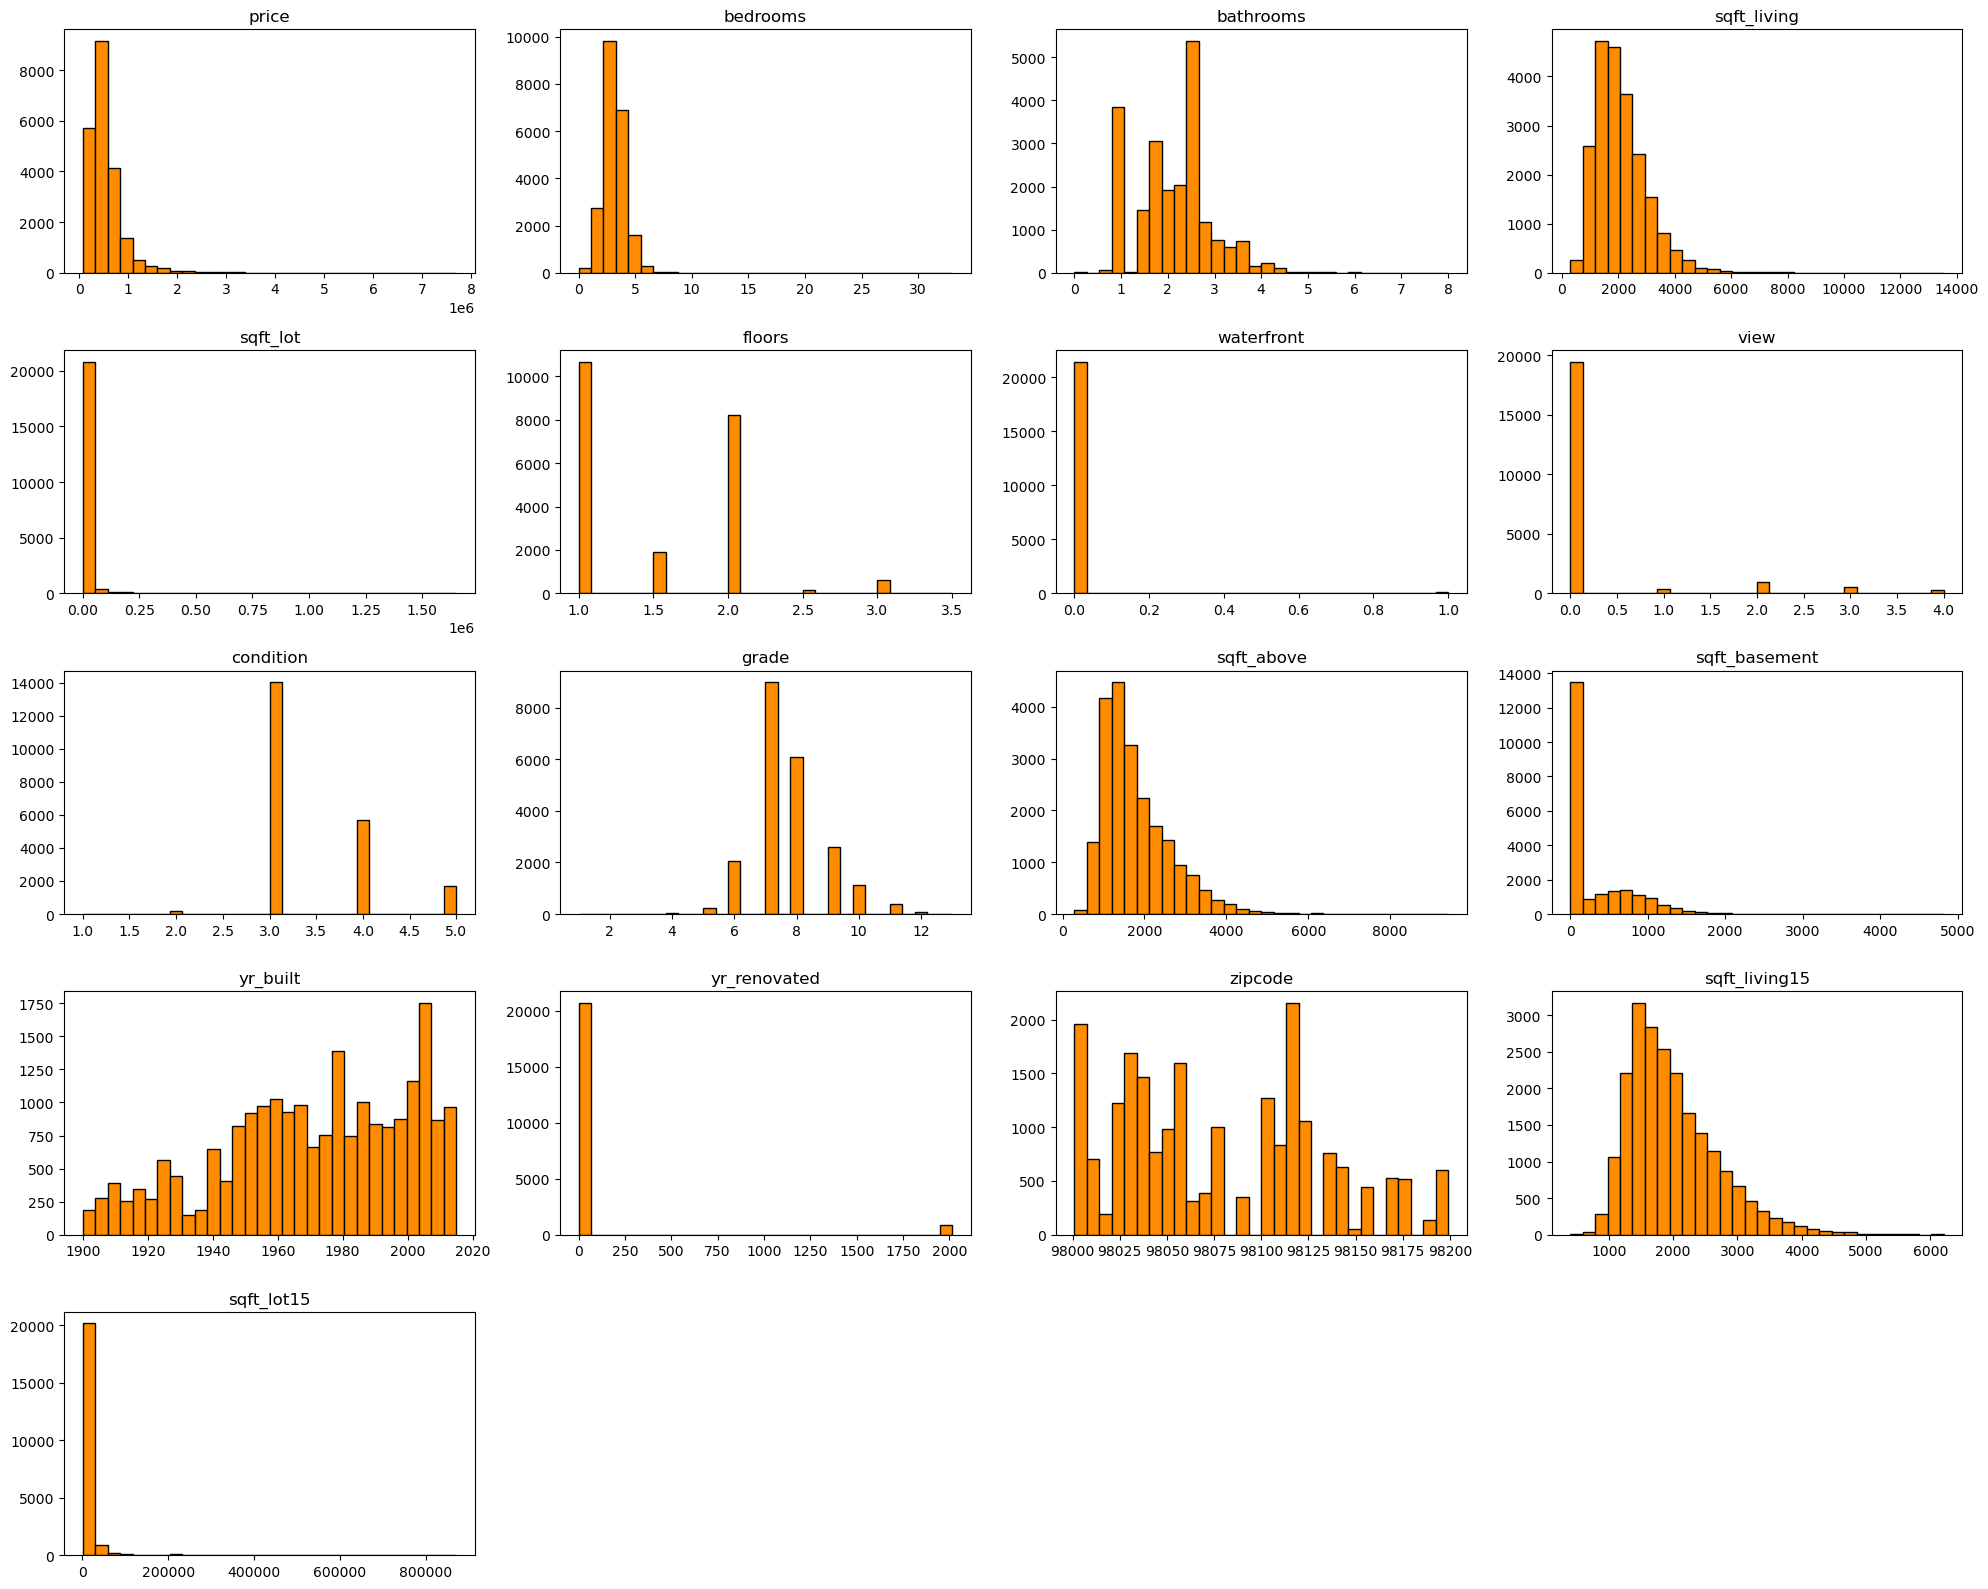

In [14]:
color = '#FF8C00'

nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

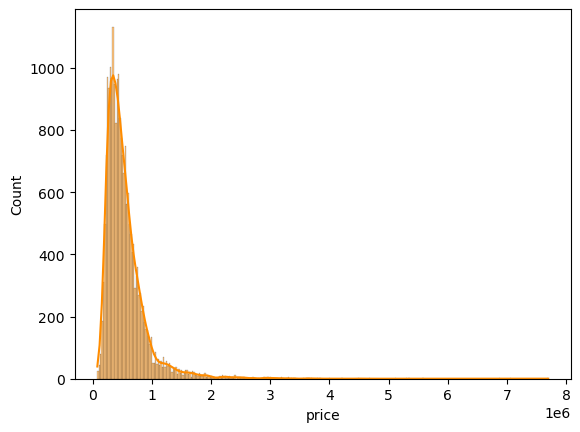

In [15]:
sns.histplot(df["price"], color=color, kde=True);
#distribution is right skewed

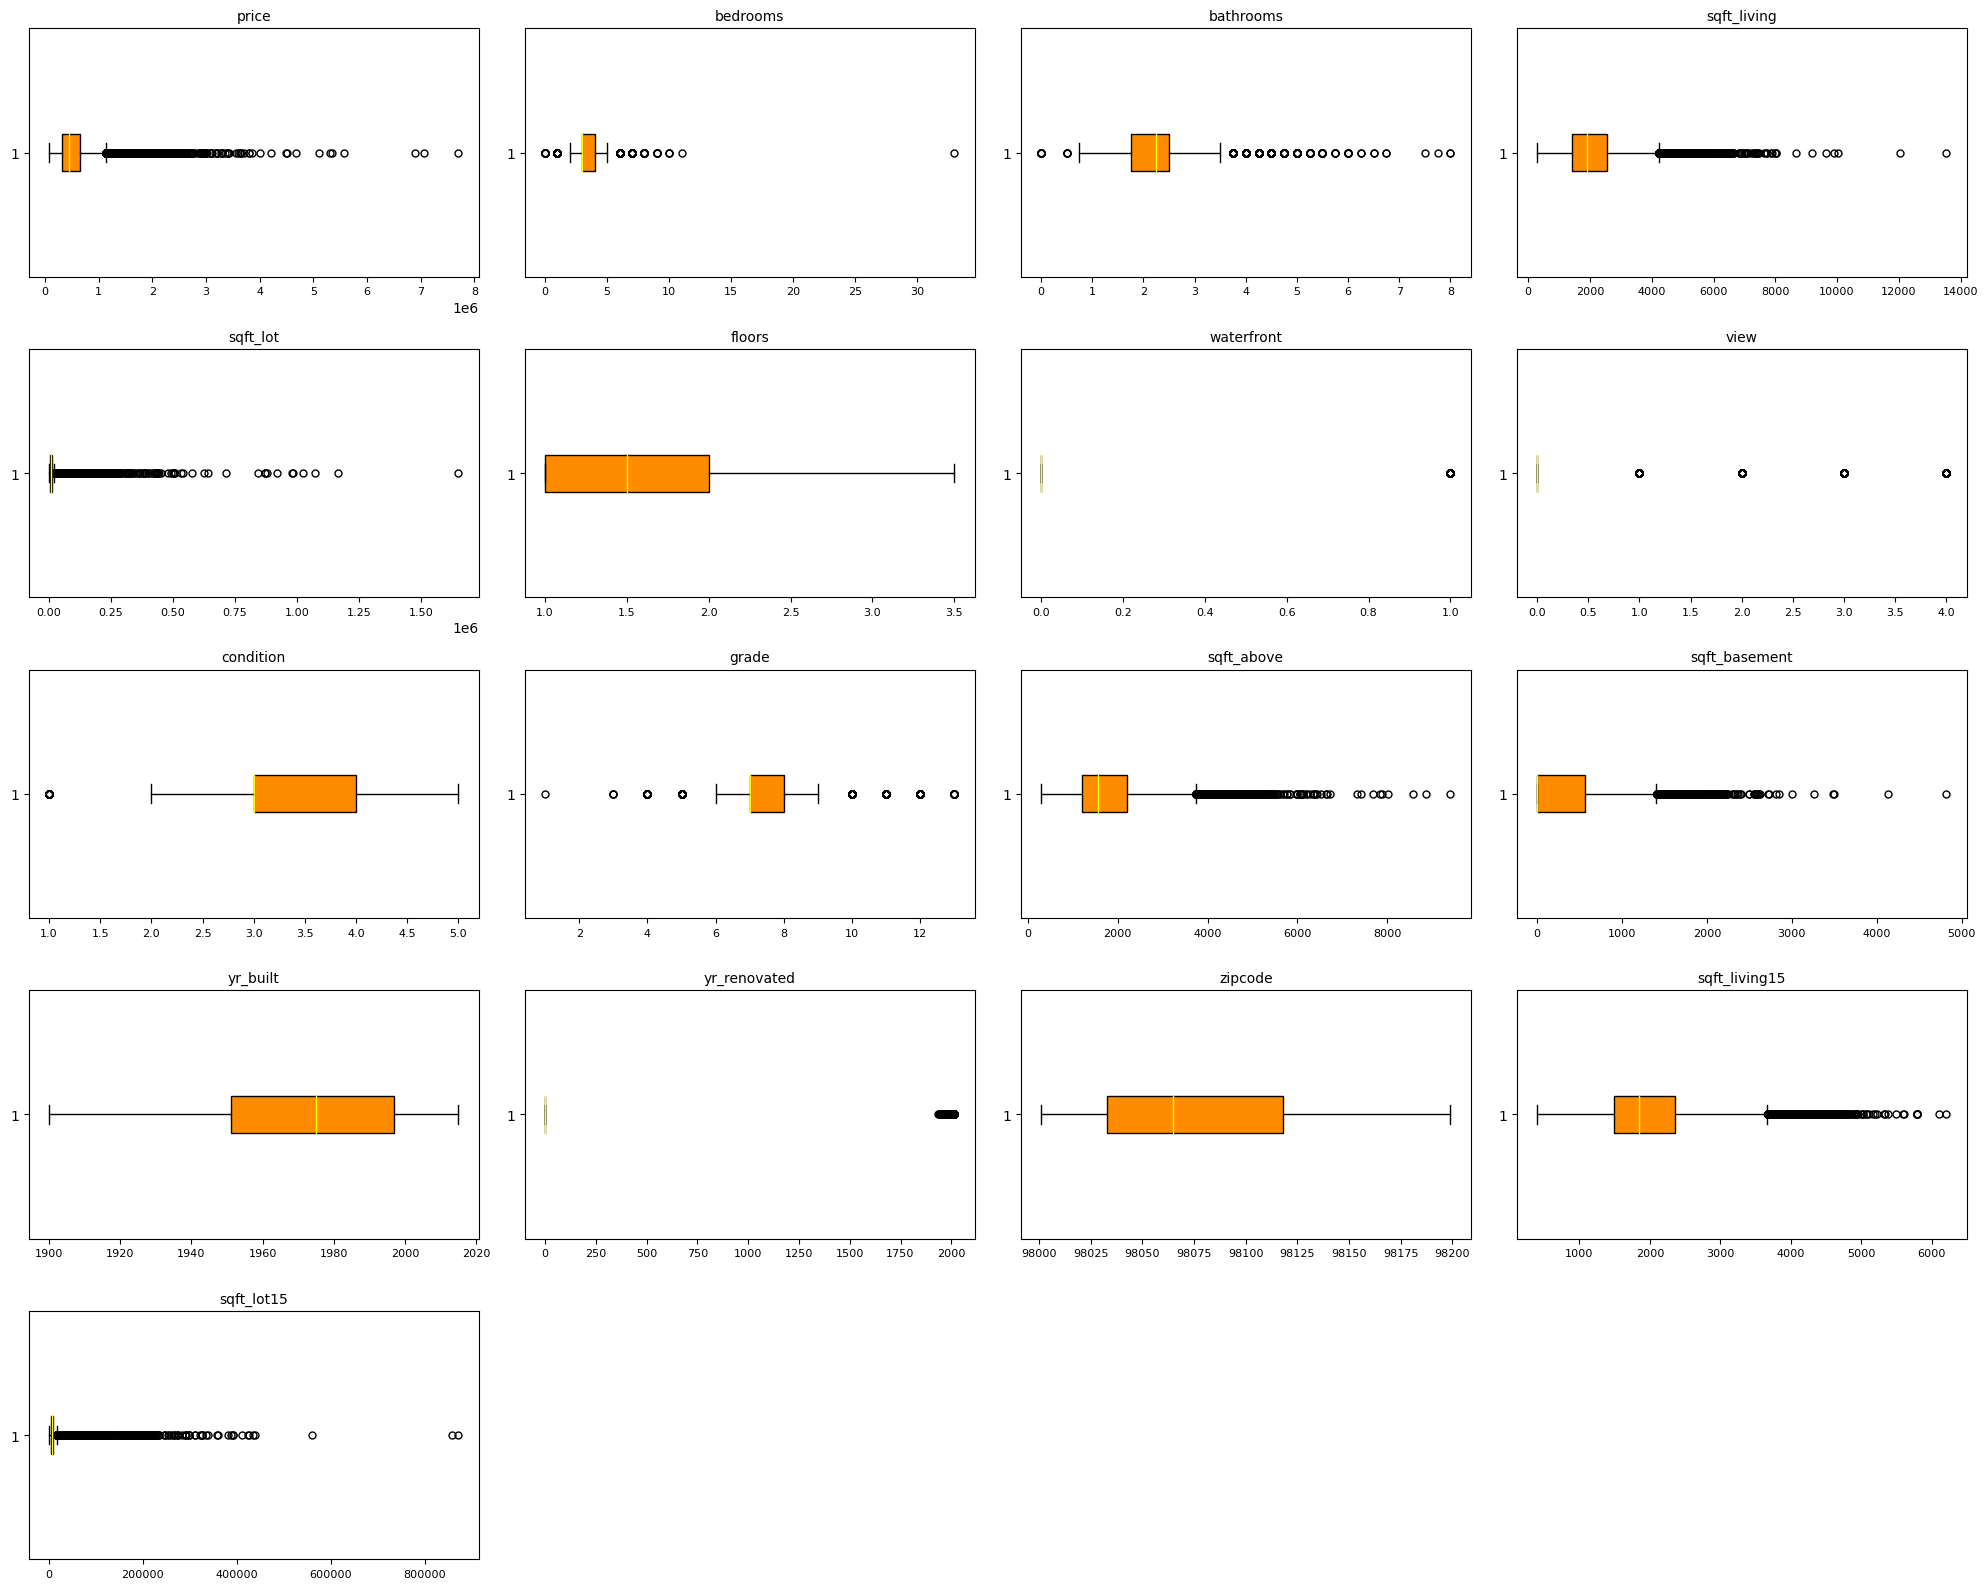

In [16]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [17]:
df.groupby('zipcode')['price'].median().sort_values(ascending=False)[:5]

zipcode
98039   1892500.00
98004   1150000.00
98040    993750.00
98112    915000.00
98005    765475.00
Name: price, dtype: float64

In [18]:
zipcode_top = df.groupby('zipcode')['price'].median().sort_values(ascending=False)[:5]

In [19]:
zipcode_top = pd.DataFrame(zipcode_top)
zipcode_top.reset_index(inplace=True)
zipcode_top

,zipcode,price
0,98039,1892500.00
1,98004,1150000.00
2,98040,993750.00
3,98112,915000.00
4,98005,765475.00


In [20]:
zipcode_top.columns

Index(['zipcode', 'price'], dtype='object')

In [21]:
zipcode_top = zipcode_top['zipcode'].tolist()

In [22]:
zipcode_top

[98039, 98004, 98040, 98112, 98005]

In [23]:
df['zipcode_top'] = df['zipcode'].apply(lambda x: x if x in zipcode_top else 'other')

In [24]:
df.zipcode_top.value_counts()

zipcode_top
other    20521
98004      317
98040      282
98112      269
98005      168
98039       50
Name: count, dtype: int64

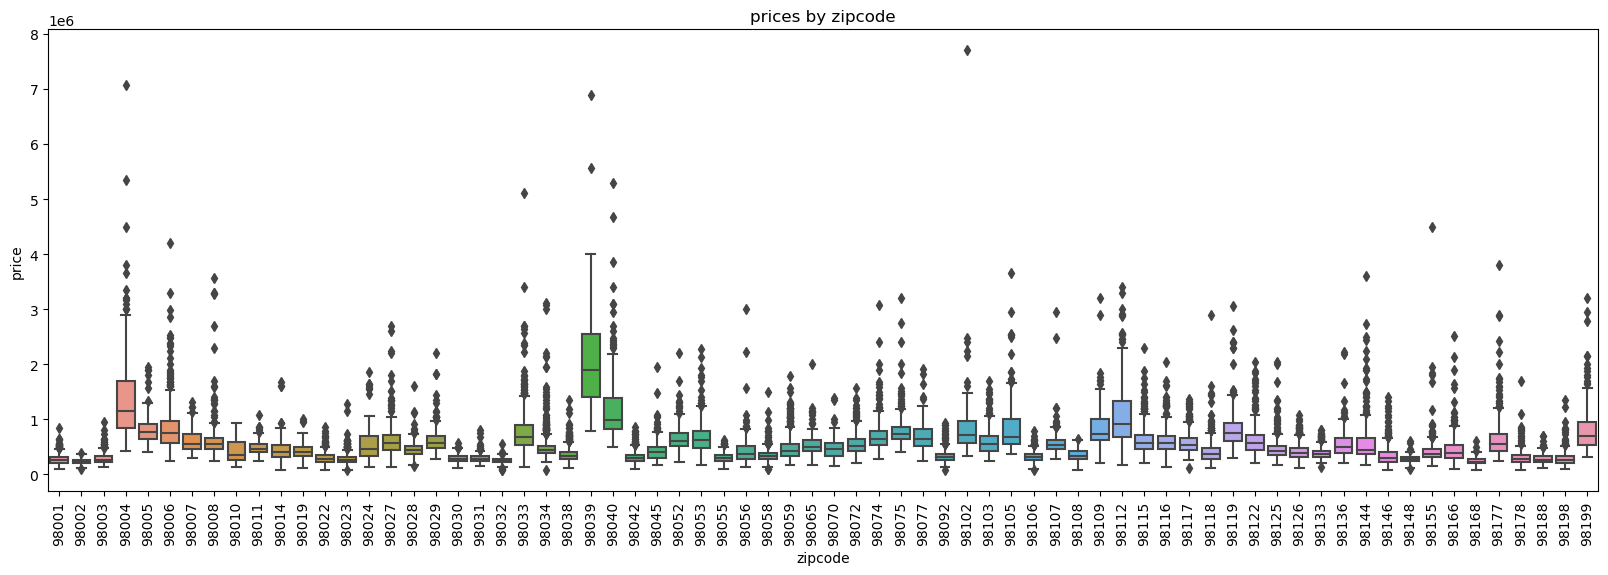

In [25]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('prices by zipcode')
plt.xticks(rotation=90)
plt.show()

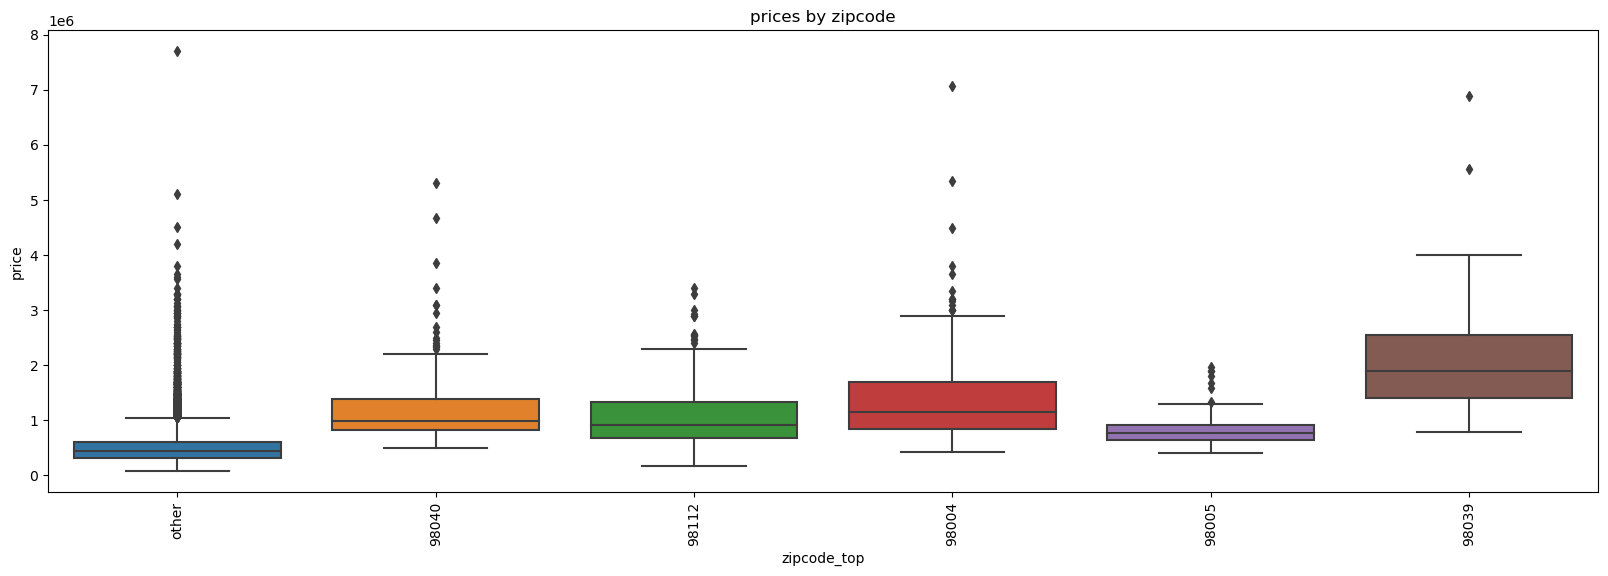

In [26]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='zipcode_top', y='price', data=df)
plt.title('prices by zipcode')
plt.xticks(rotation=90)
plt.show()

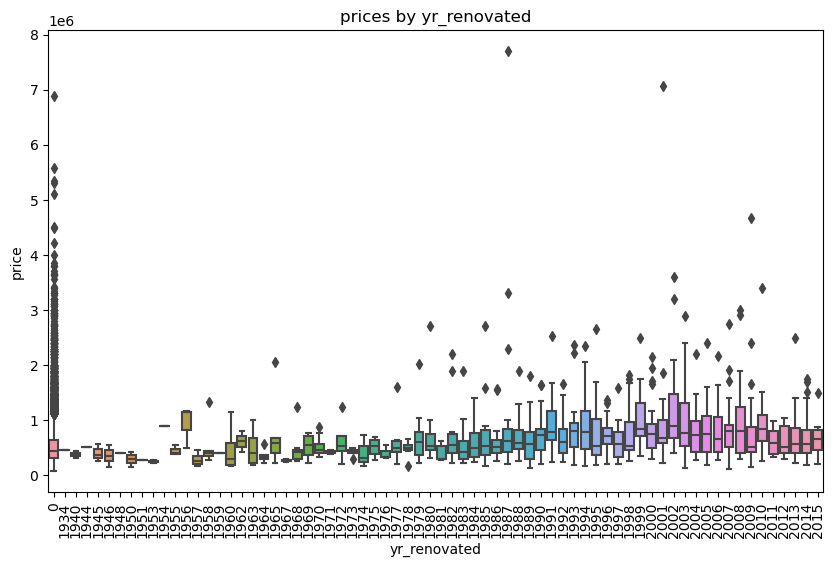

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr_renovated', y='price', data=df)
plt.title('prices by yr_renovated')
plt.xticks(rotation=90)
plt.show()

In [28]:
def renovation_cat(col):
    if col == 0:
        return 'not_renovated'
    elif col < 1980:
        return 'renovated_before_1980'
    elif col <= 2000:
        return 'renovated_1980_2000'
    else:
        return 'renovated_after_2000'

In [29]:
df['yr_renovated_cat'] = df['yr_renovated'].apply(renovation_cat)

In [30]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,zipcode_top,yr_renovated_cat
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,1340,5650,other,not_renovated
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,1690,7639,other,renovated_1980_2000
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,2720,8062,other,not_renovated


In [31]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'zipcode_top', 'yr_renovated_cat'],
      dtype='object')

In [32]:
df.yr_renovated.value_counts()[:5] 

yr_renovated
0       20694
2014       91
2013       37
2003       36
2005       35
Name: count, dtype: int64

In [33]:
df.yr_renovated_cat.value_counts() 

yr_renovated_cat
not_renovated            20694
renovated_after_2000       423
renovated_1980_2000        368
renovated_before_1980      122
Name: count, dtype: int64

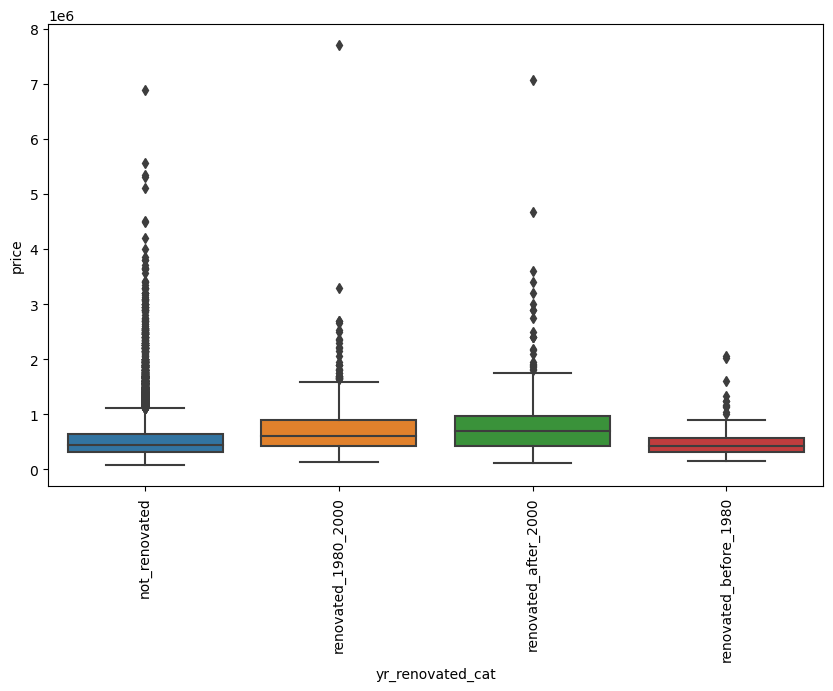

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.yr_renovated_cat, y='price', data=df)
plt.xticks(rotation=90)
plt.show()

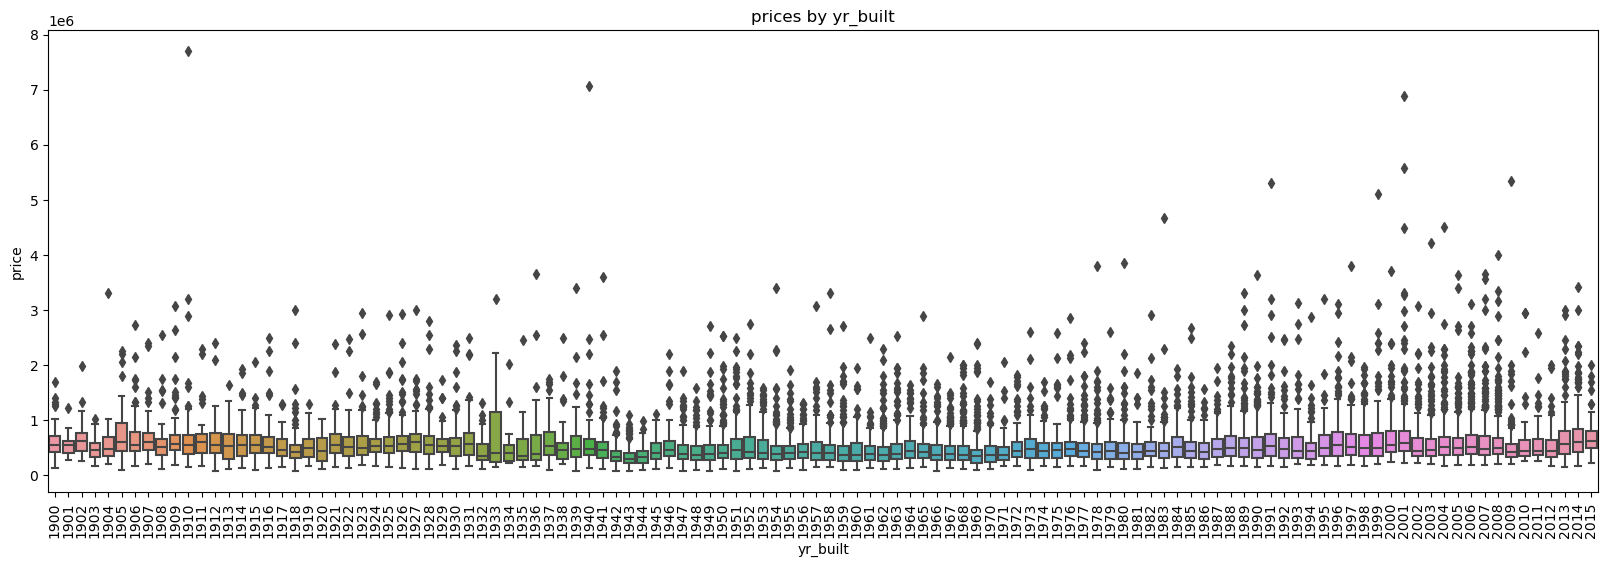

In [35]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='yr_built', y='price', data=df)
plt.title('prices by yr_built')
plt.xticks(rotation=90)
plt.show()

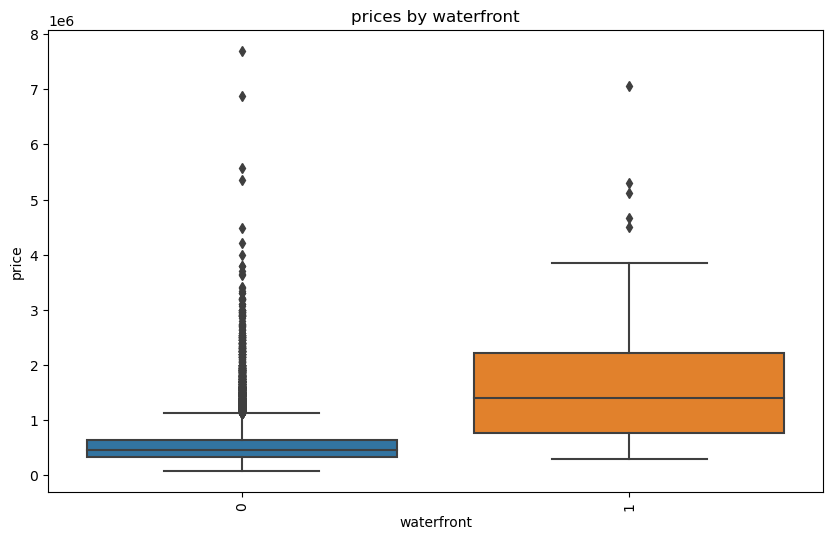

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('prices by waterfront')
plt.xticks(rotation=90)
plt.show()

In [37]:
df_dummied = df.copy()

In [38]:
df_dummied = pd.get_dummies(df_dummied, columns=['yr_renovated_cat', 'waterfront', 'zipcode_top'])

In [39]:
df_dummied = df_dummied.drop(columns=['yr_renovated', 'zipcode'])

In [40]:
df_dummied.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_renovated_cat_not_renovated,yr_renovated_cat_renovated_1980_2000,yr_renovated_cat_renovated_after_2000,yr_renovated_cat_renovated_before_1980,waterfront_0,waterfront_1,zipcode_top_98004,zipcode_top_98005,zipcode_top_98039,zipcode_top_98040,zipcode_top_98112,zipcode_top_other
0,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,0,1955,1340,5650,True,False,False,False,True,False,False,False,False,False,False,True
1,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1690,7639,False,True,False,False,True,False,False,False,False,False,False,True
2,180000.00,2,1.00,770,10000,1.00,0,3,6,770,0,1933,2720,8062,True,False,False,False,True,False,False,False,False,False,False,True
3,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,1360,5000,True,False,False,False,True,False,False,False,False,False,False,True
4,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,1800,7503,True,False,False,False,True,False,False,False,False,False,False,True


In [41]:
df_dummied.corrwith(df["price"]).sort_values(ascending=False)

price                                     1.00
sqft_living                               0.70
grade                                     0.67
sqft_above                                0.61
sqft_living15                             0.59
bathrooms                                 0.53
view                                      0.40
sqft_basement                             0.32
bedrooms                                  0.31
zipcode_top_98004                         0.27
waterfront_1                              0.27
floors                                    0.26
zipcode_top_98039                         0.21
zipcode_top_98040                         0.20
zipcode_top_98112                         0.17
yr_renovated_cat_renovated_after_2000     0.11
sqft_lot                                  0.09
yr_renovated_cat_renovated_1980_2000      0.09
sqft_lot15                                0.08
zipcode_top_98005                         0.07
yr_built                                  0.05
condition    

In [42]:
num_corr = round(df_dummied.corr(), 2)

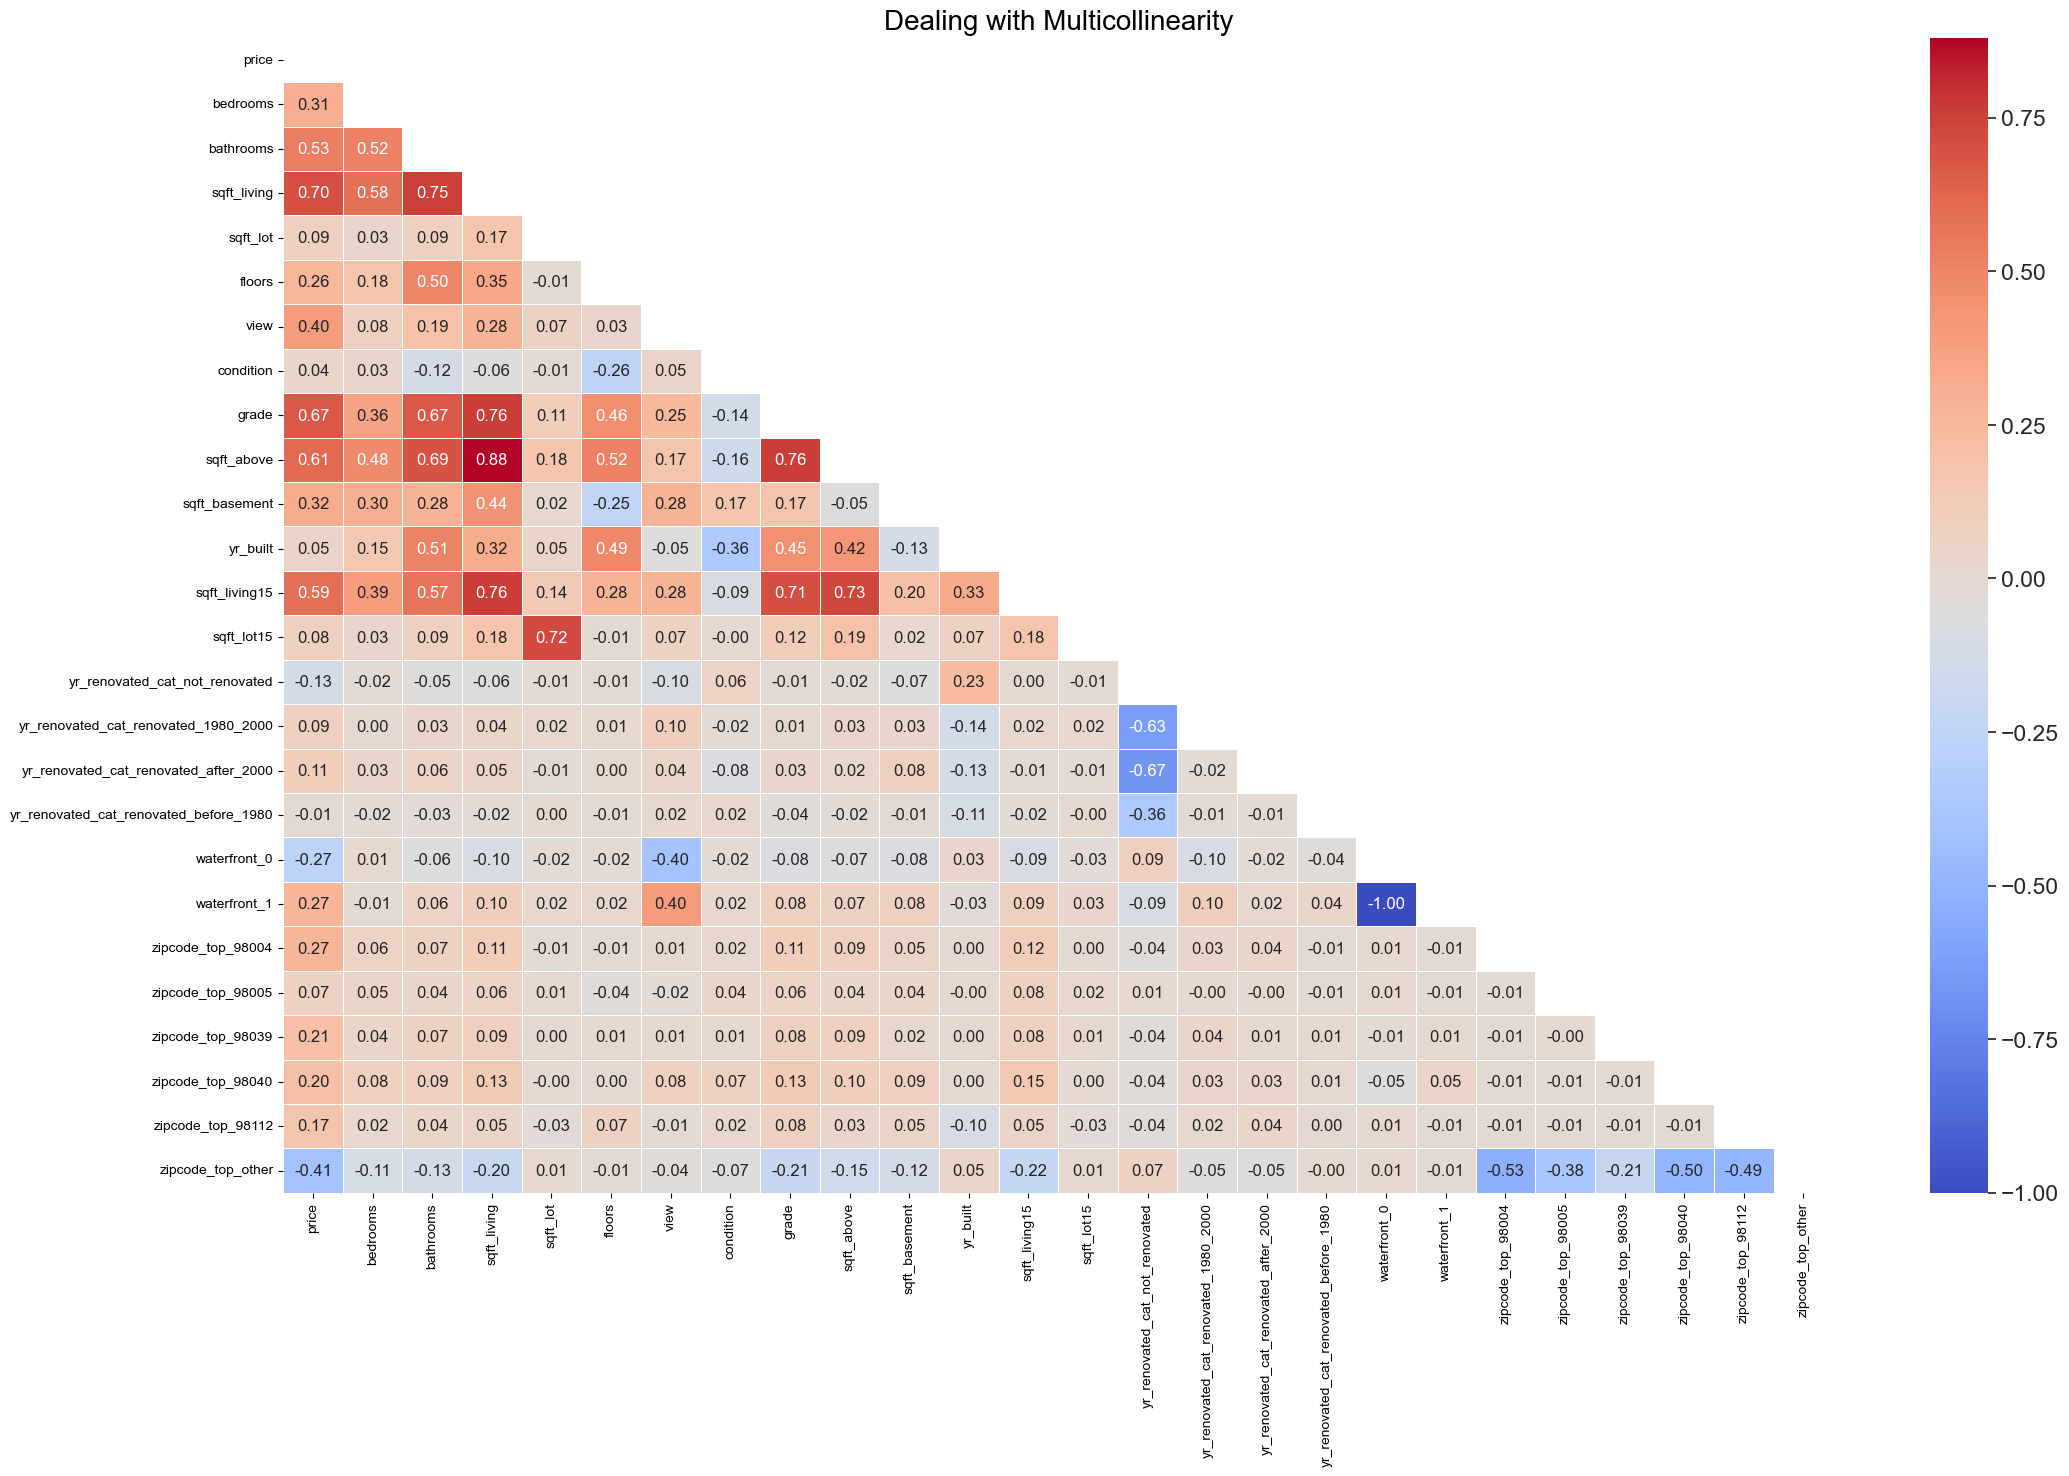

In [43]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [44]:
df_dummied = df_dummied.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15', 'view'])

In [45]:
num_corr2 = round(df_dummied.corr(), 2)

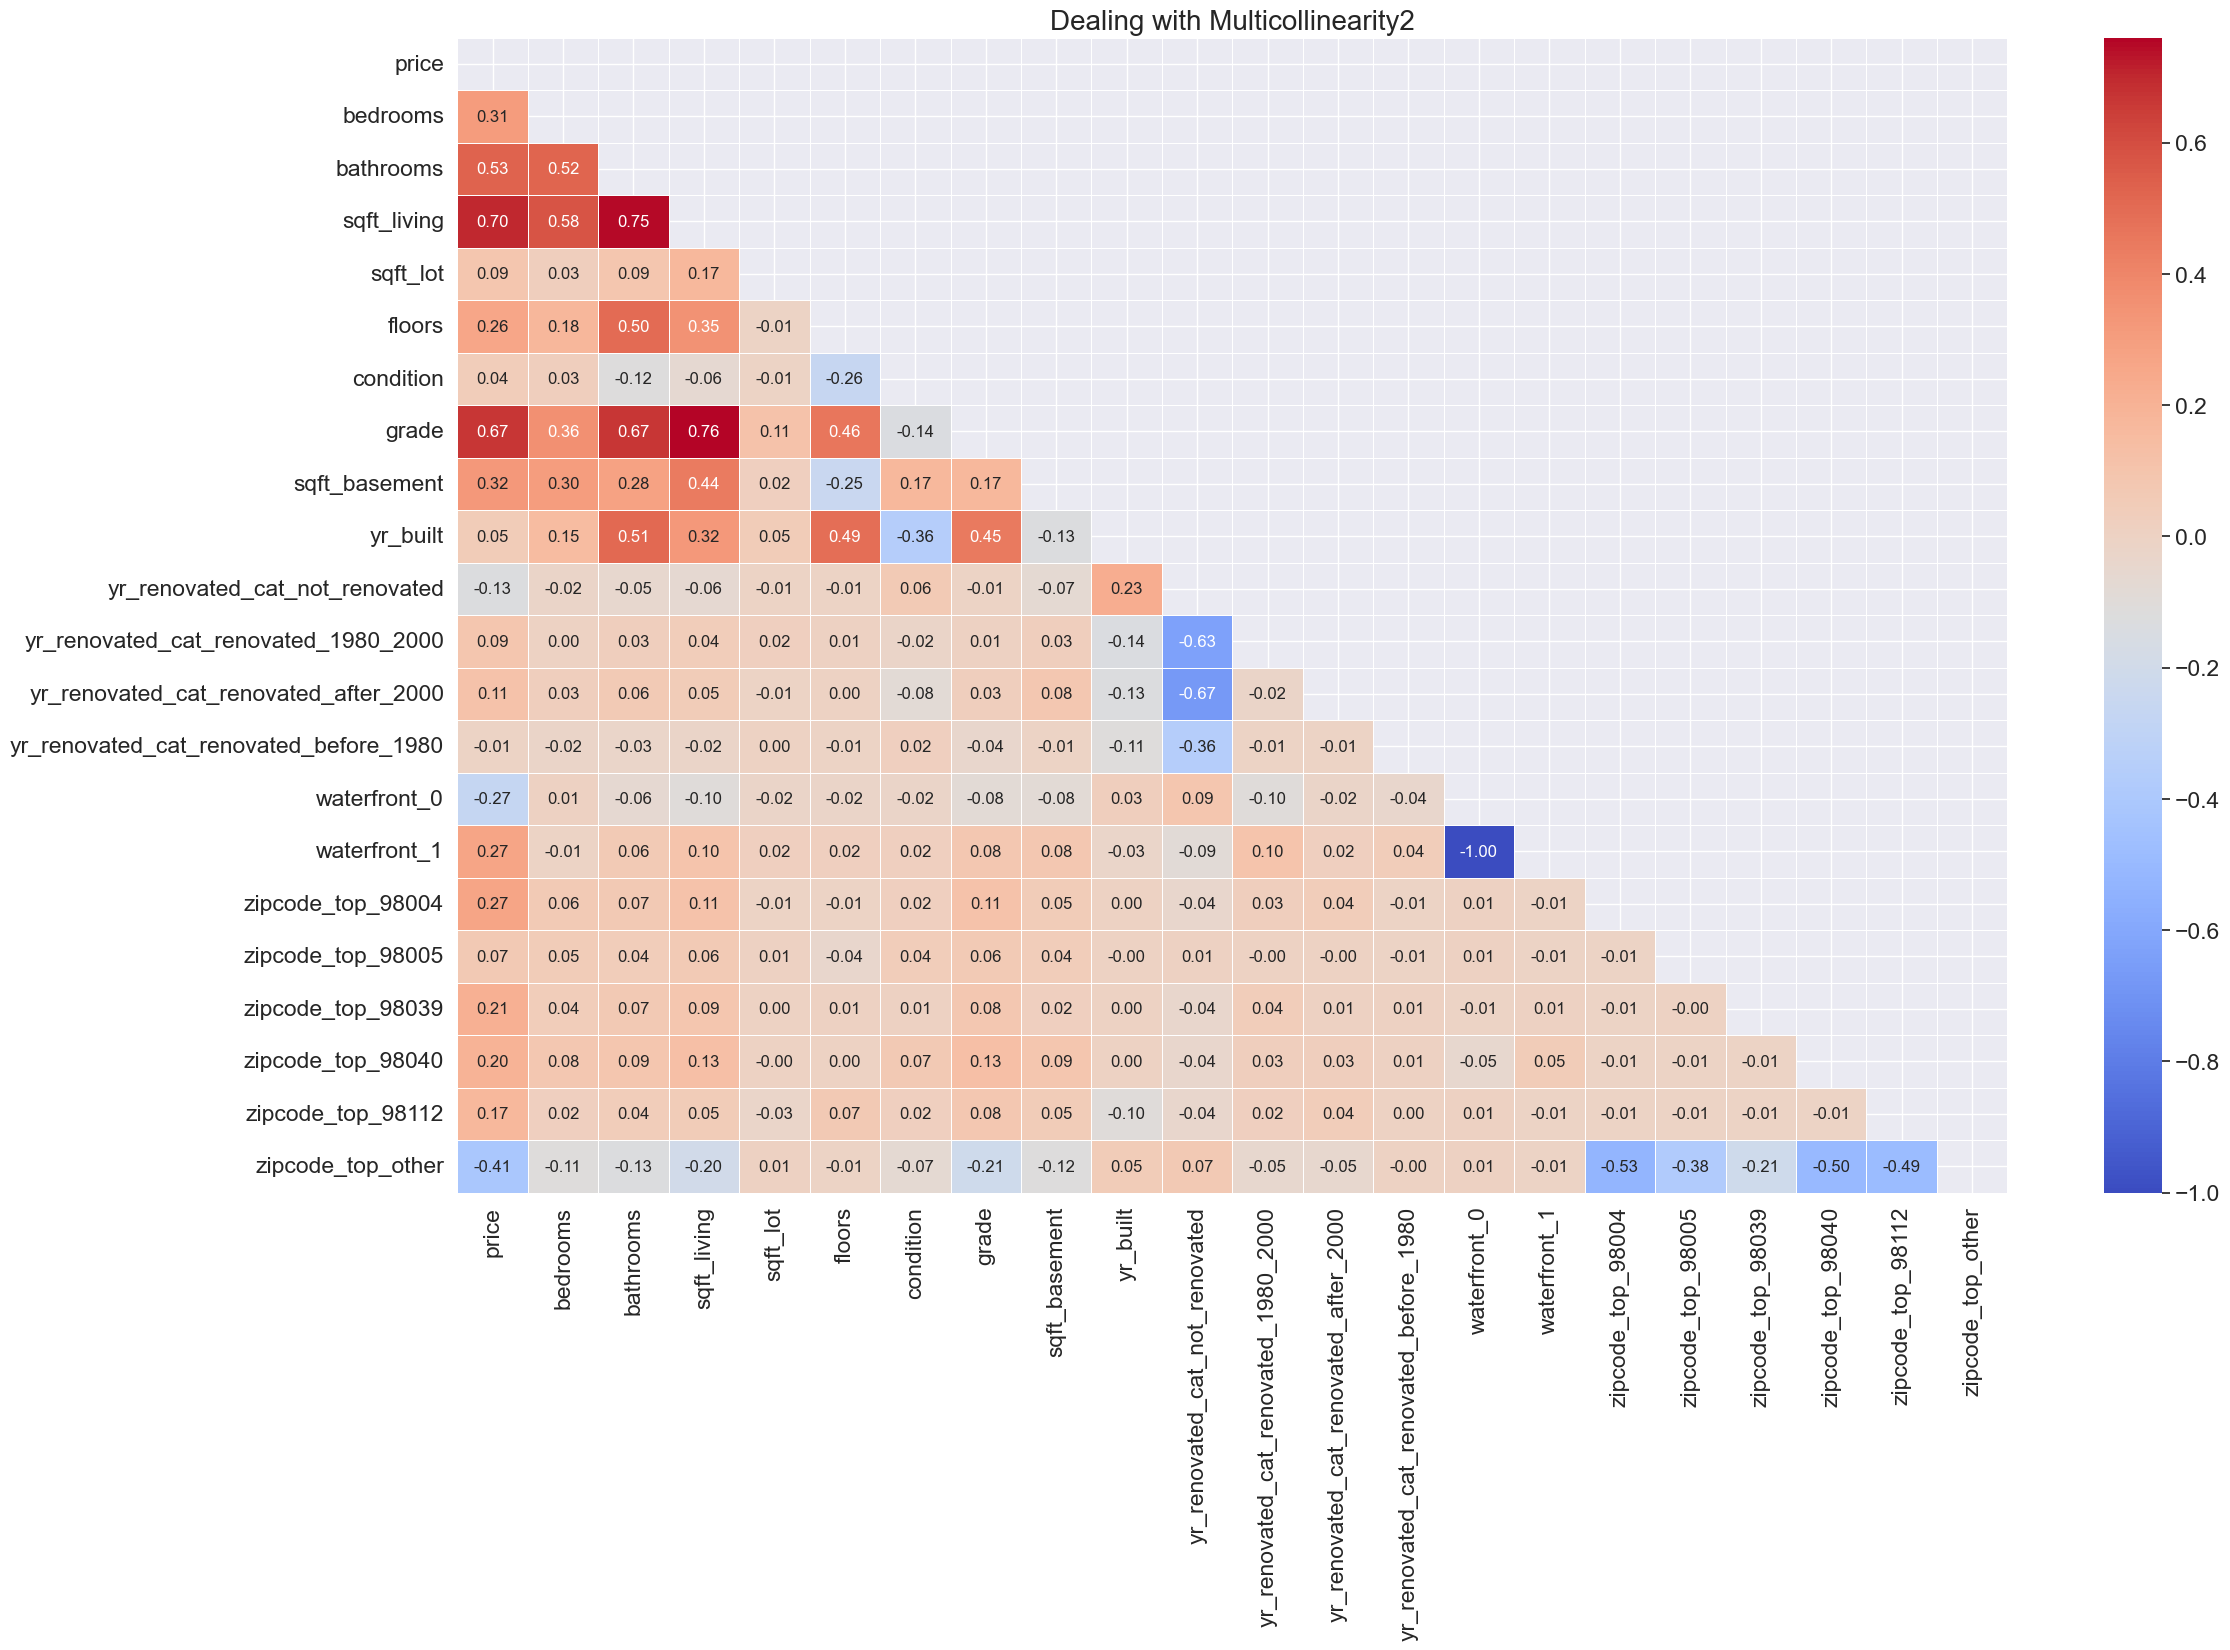

In [46]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr2, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity2", fontsize=20) # add title
plt.show()

In [47]:
df_dummied = df_dummied.drop(columns=['grade'])

In [48]:
num_corr3 = round(df_dummied.corr(), 2)

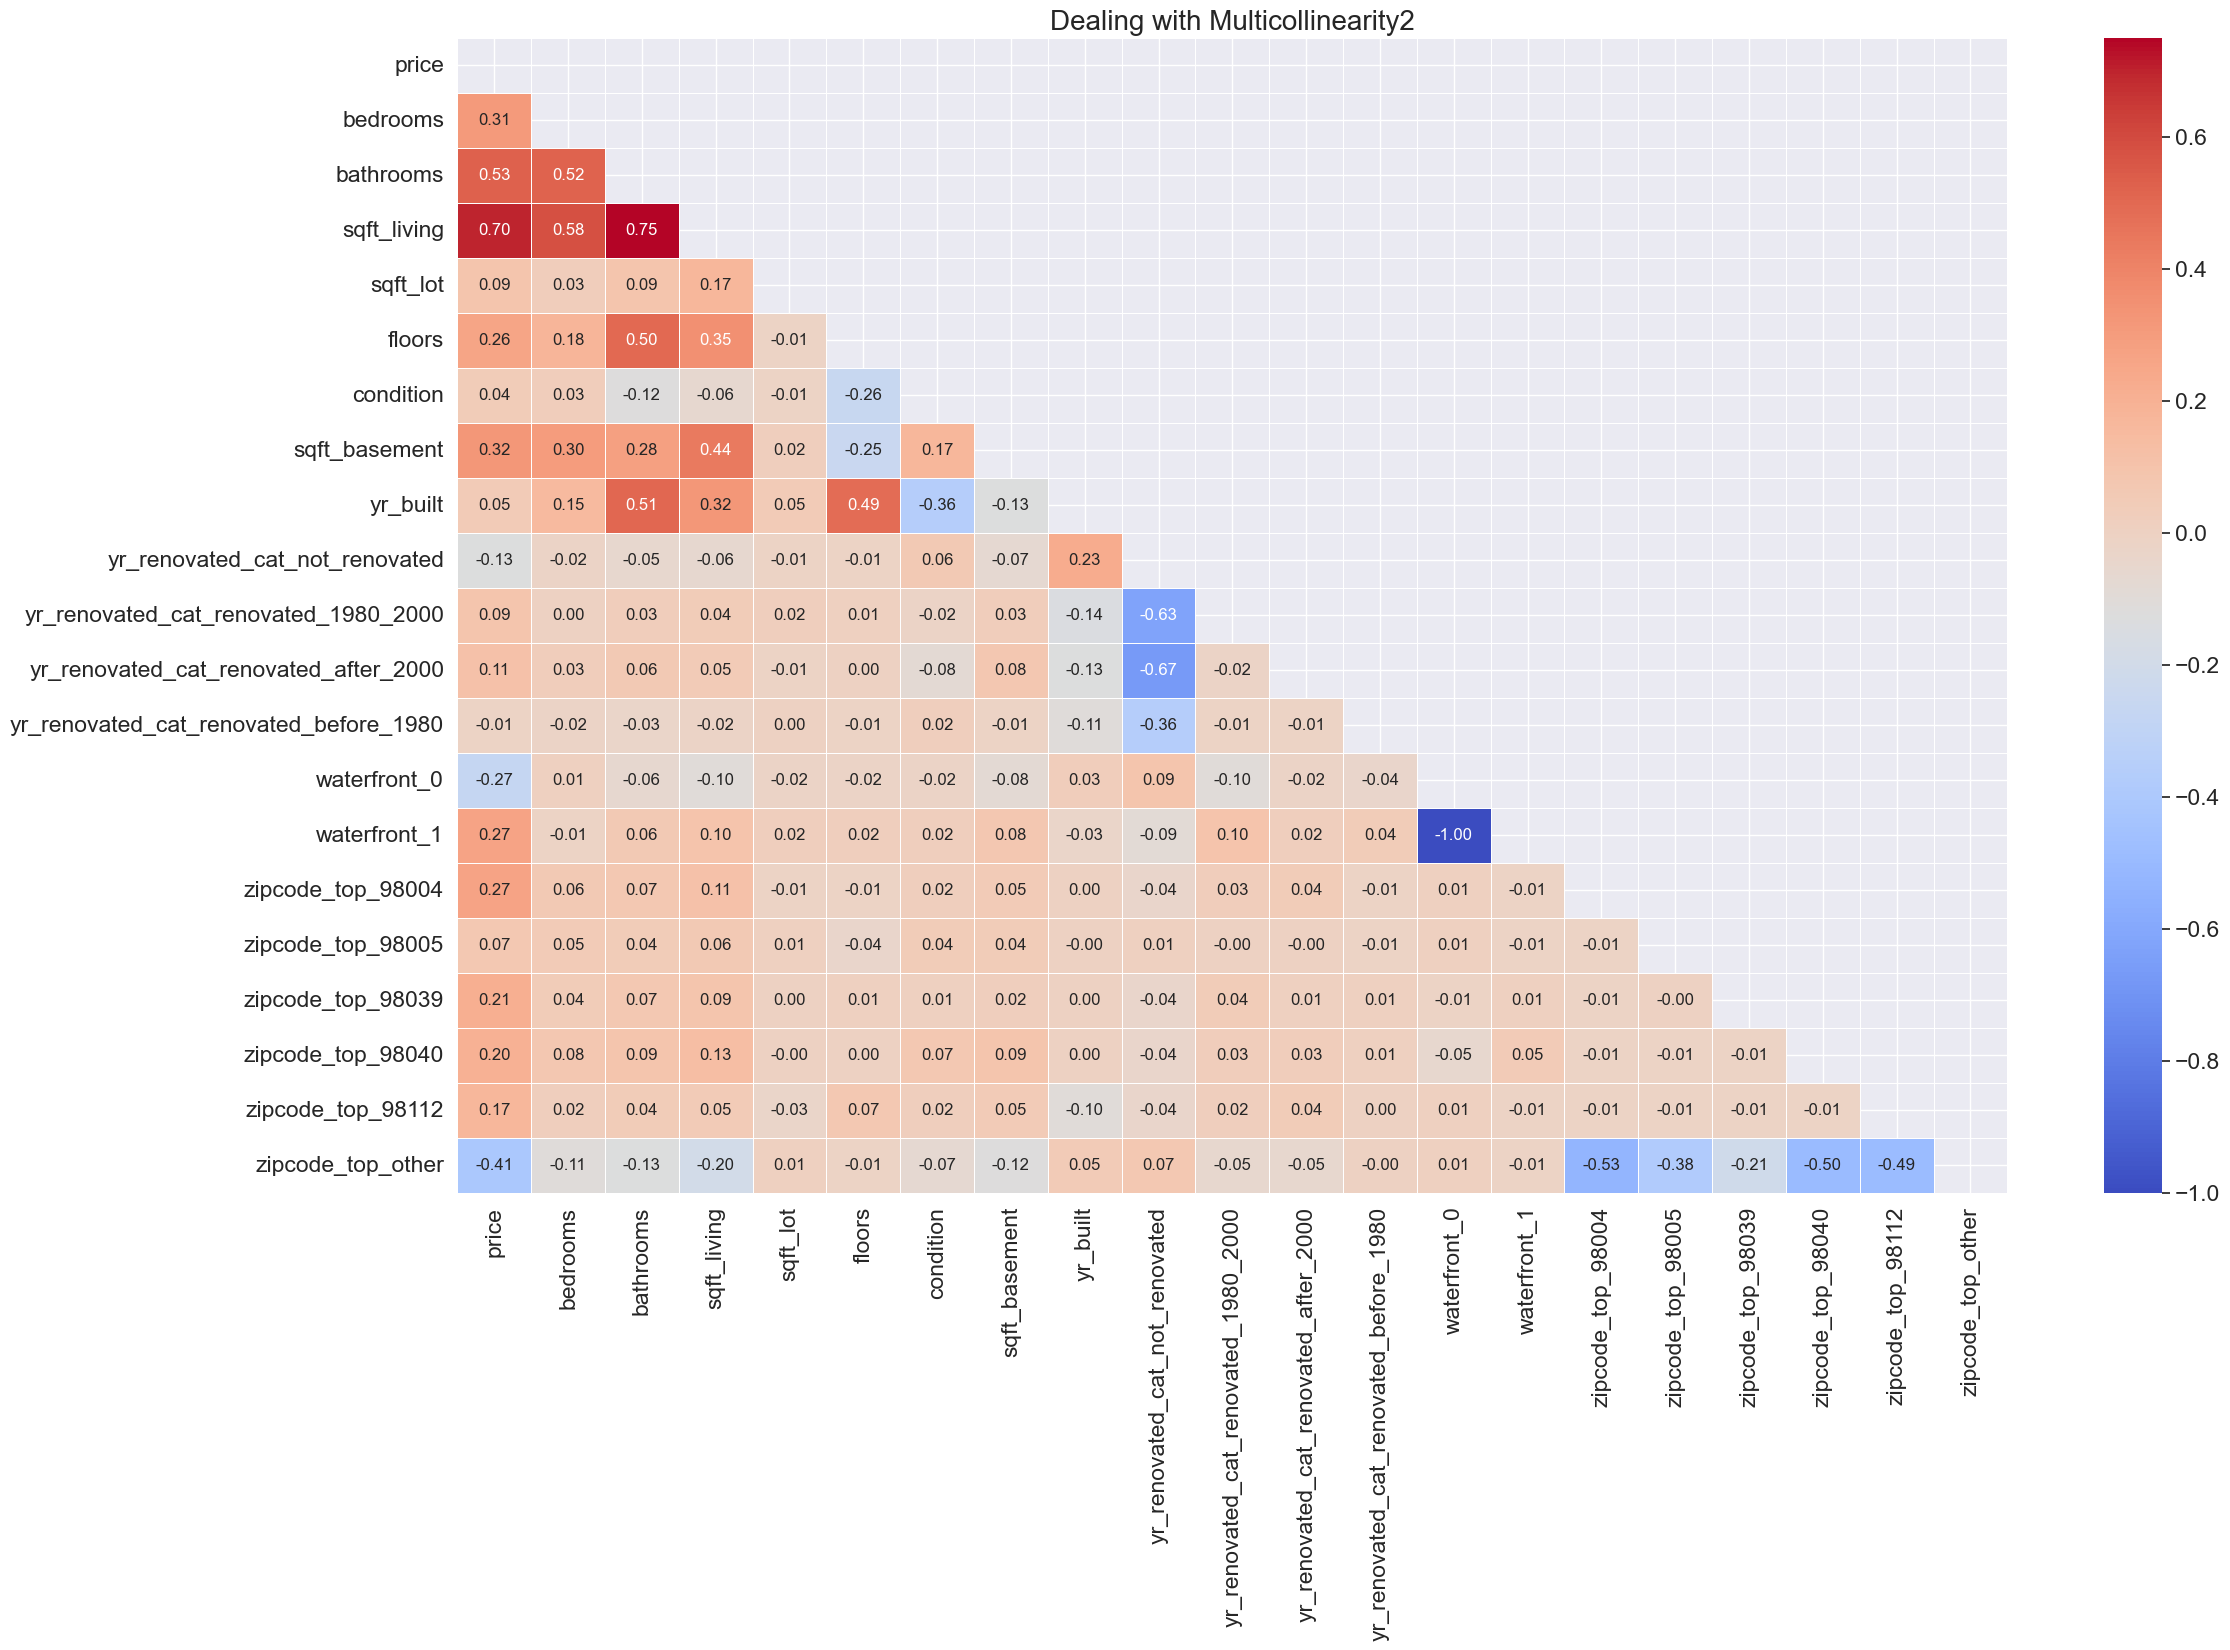

In [49]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr3)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr3, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity2", fontsize=20) # add title
plt.show()

In [50]:
df_dummied = df_dummied.drop(columns=['waterfront_0'])

In [51]:
num_corr4 = round(df_dummied.corr(), 2)

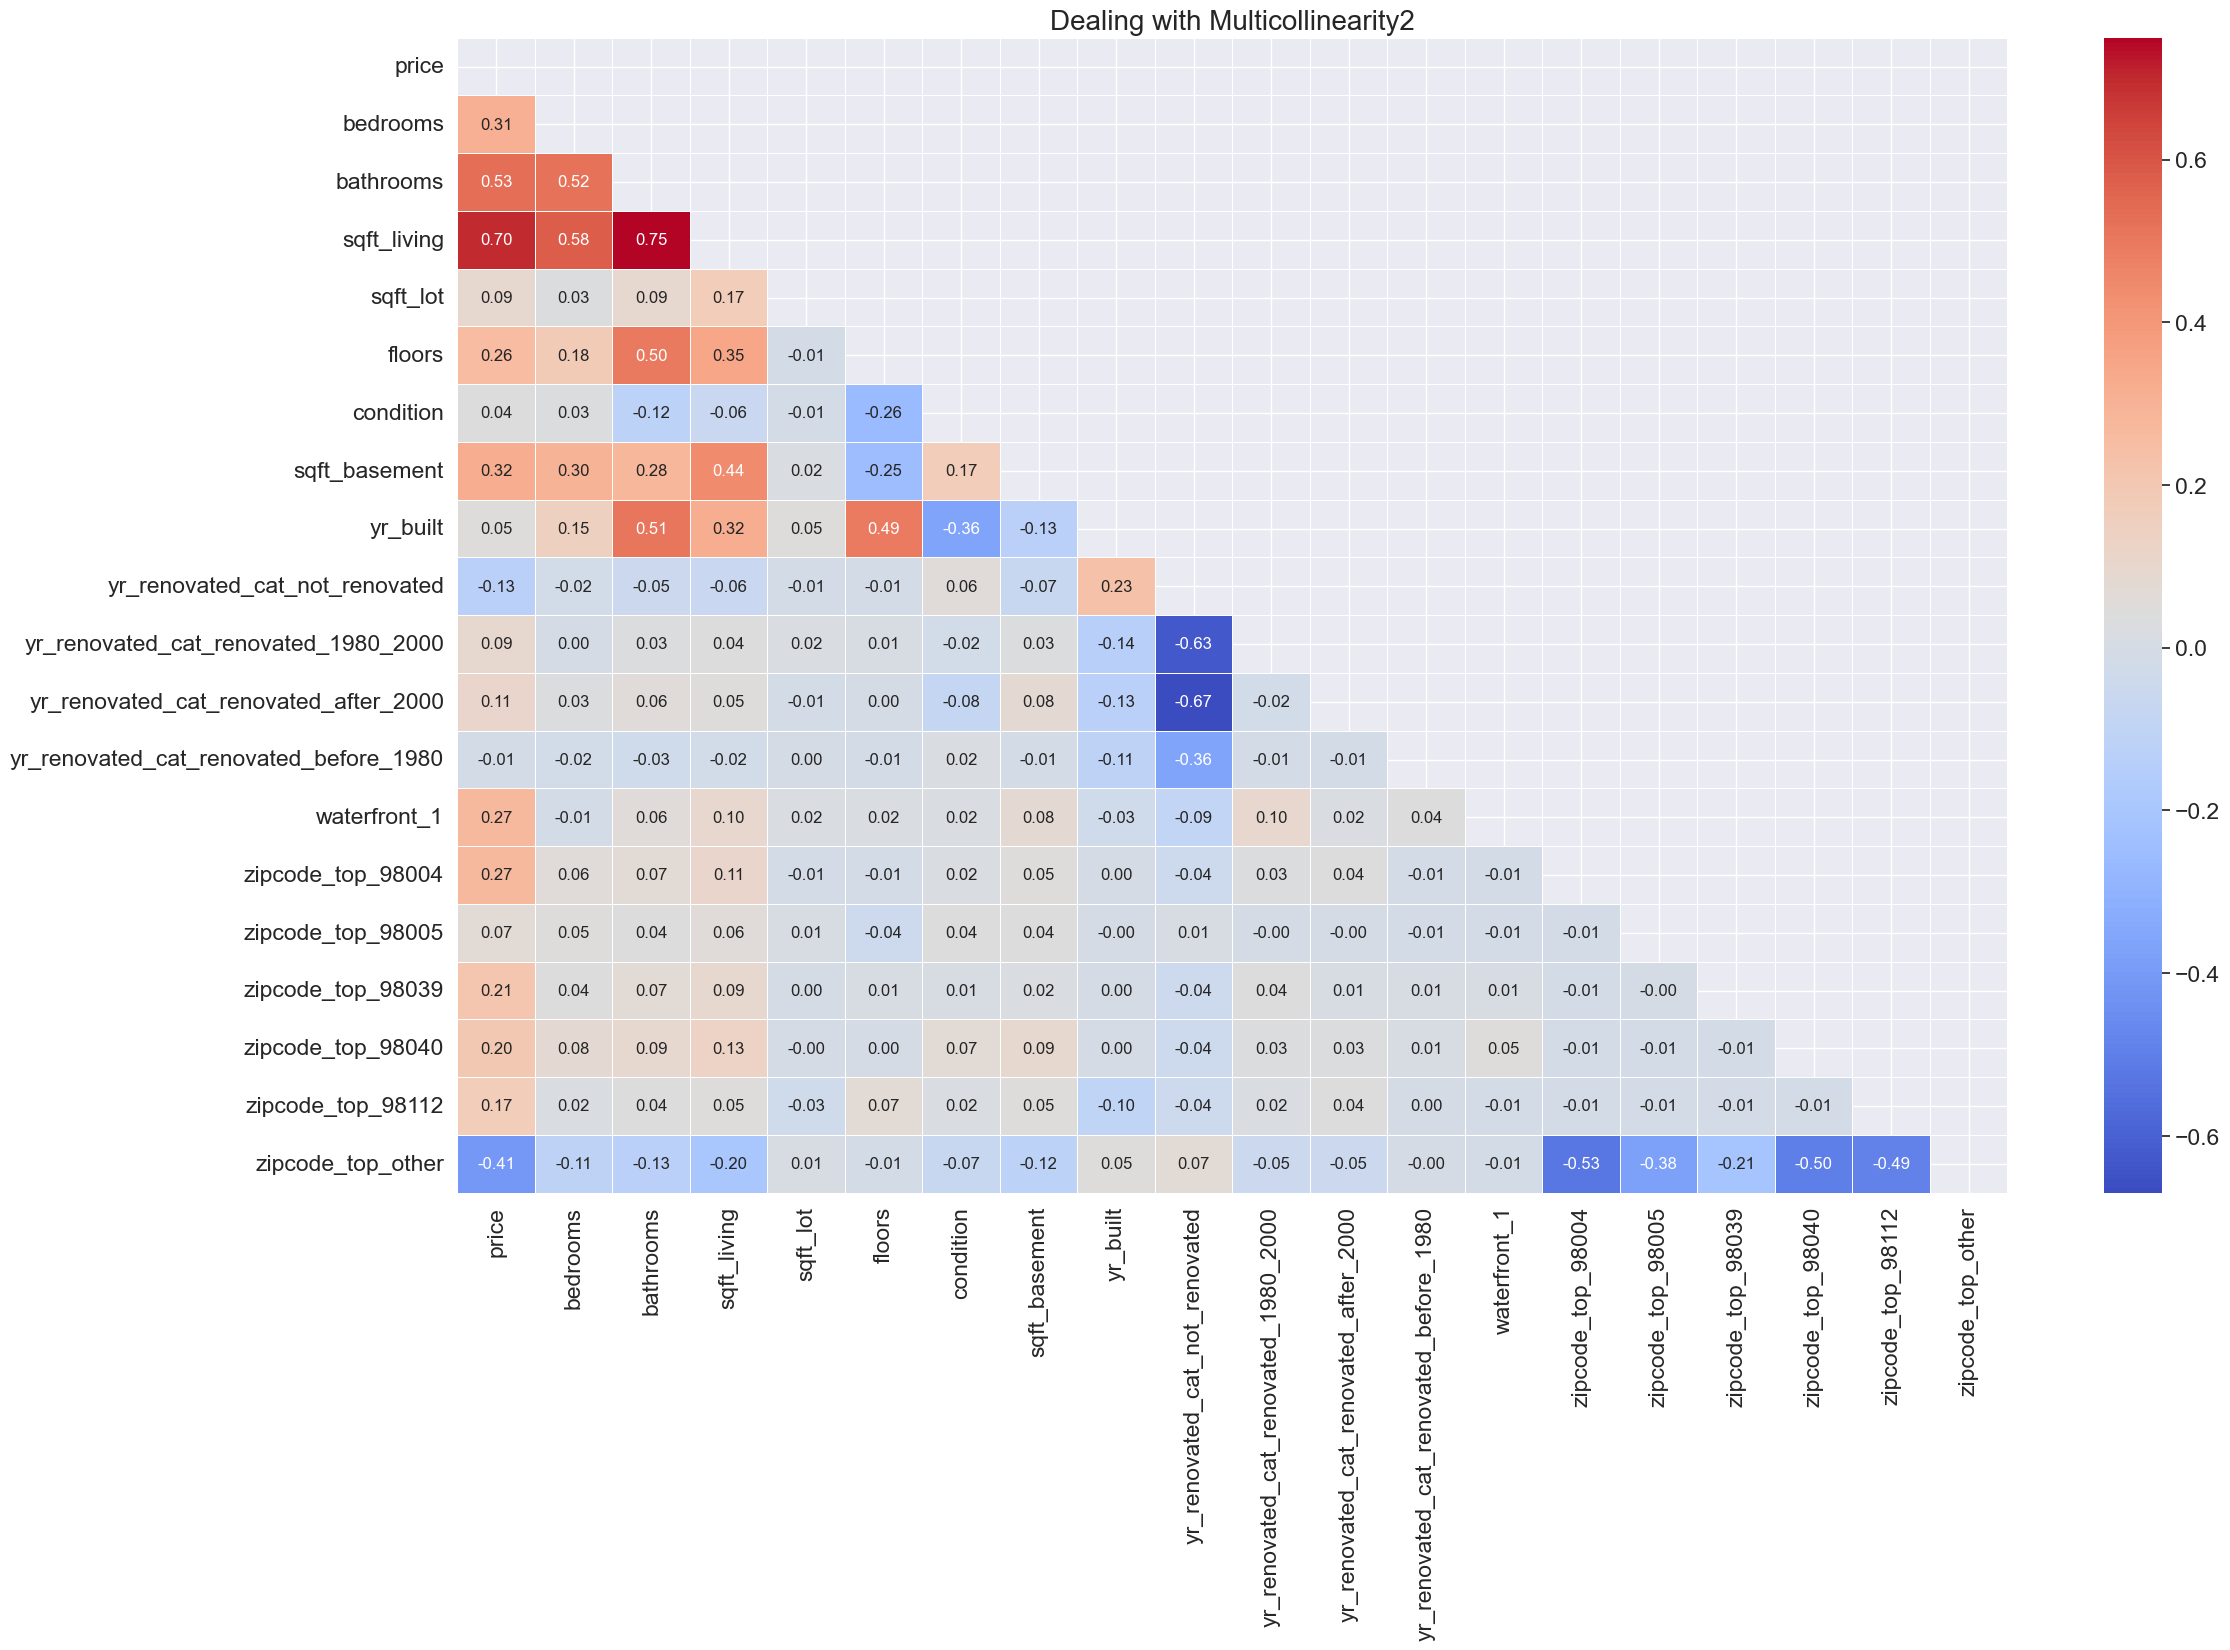

In [52]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr4)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr4, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity2", fontsize=20) # add title
plt.show()

In [53]:
df_dummied = df_dummied.drop(columns=['yr_renovated_cat_not_renovated', 'zipcode_top_other'])

In [54]:
num_corr5 = round(df_dummied.corr(), 2)

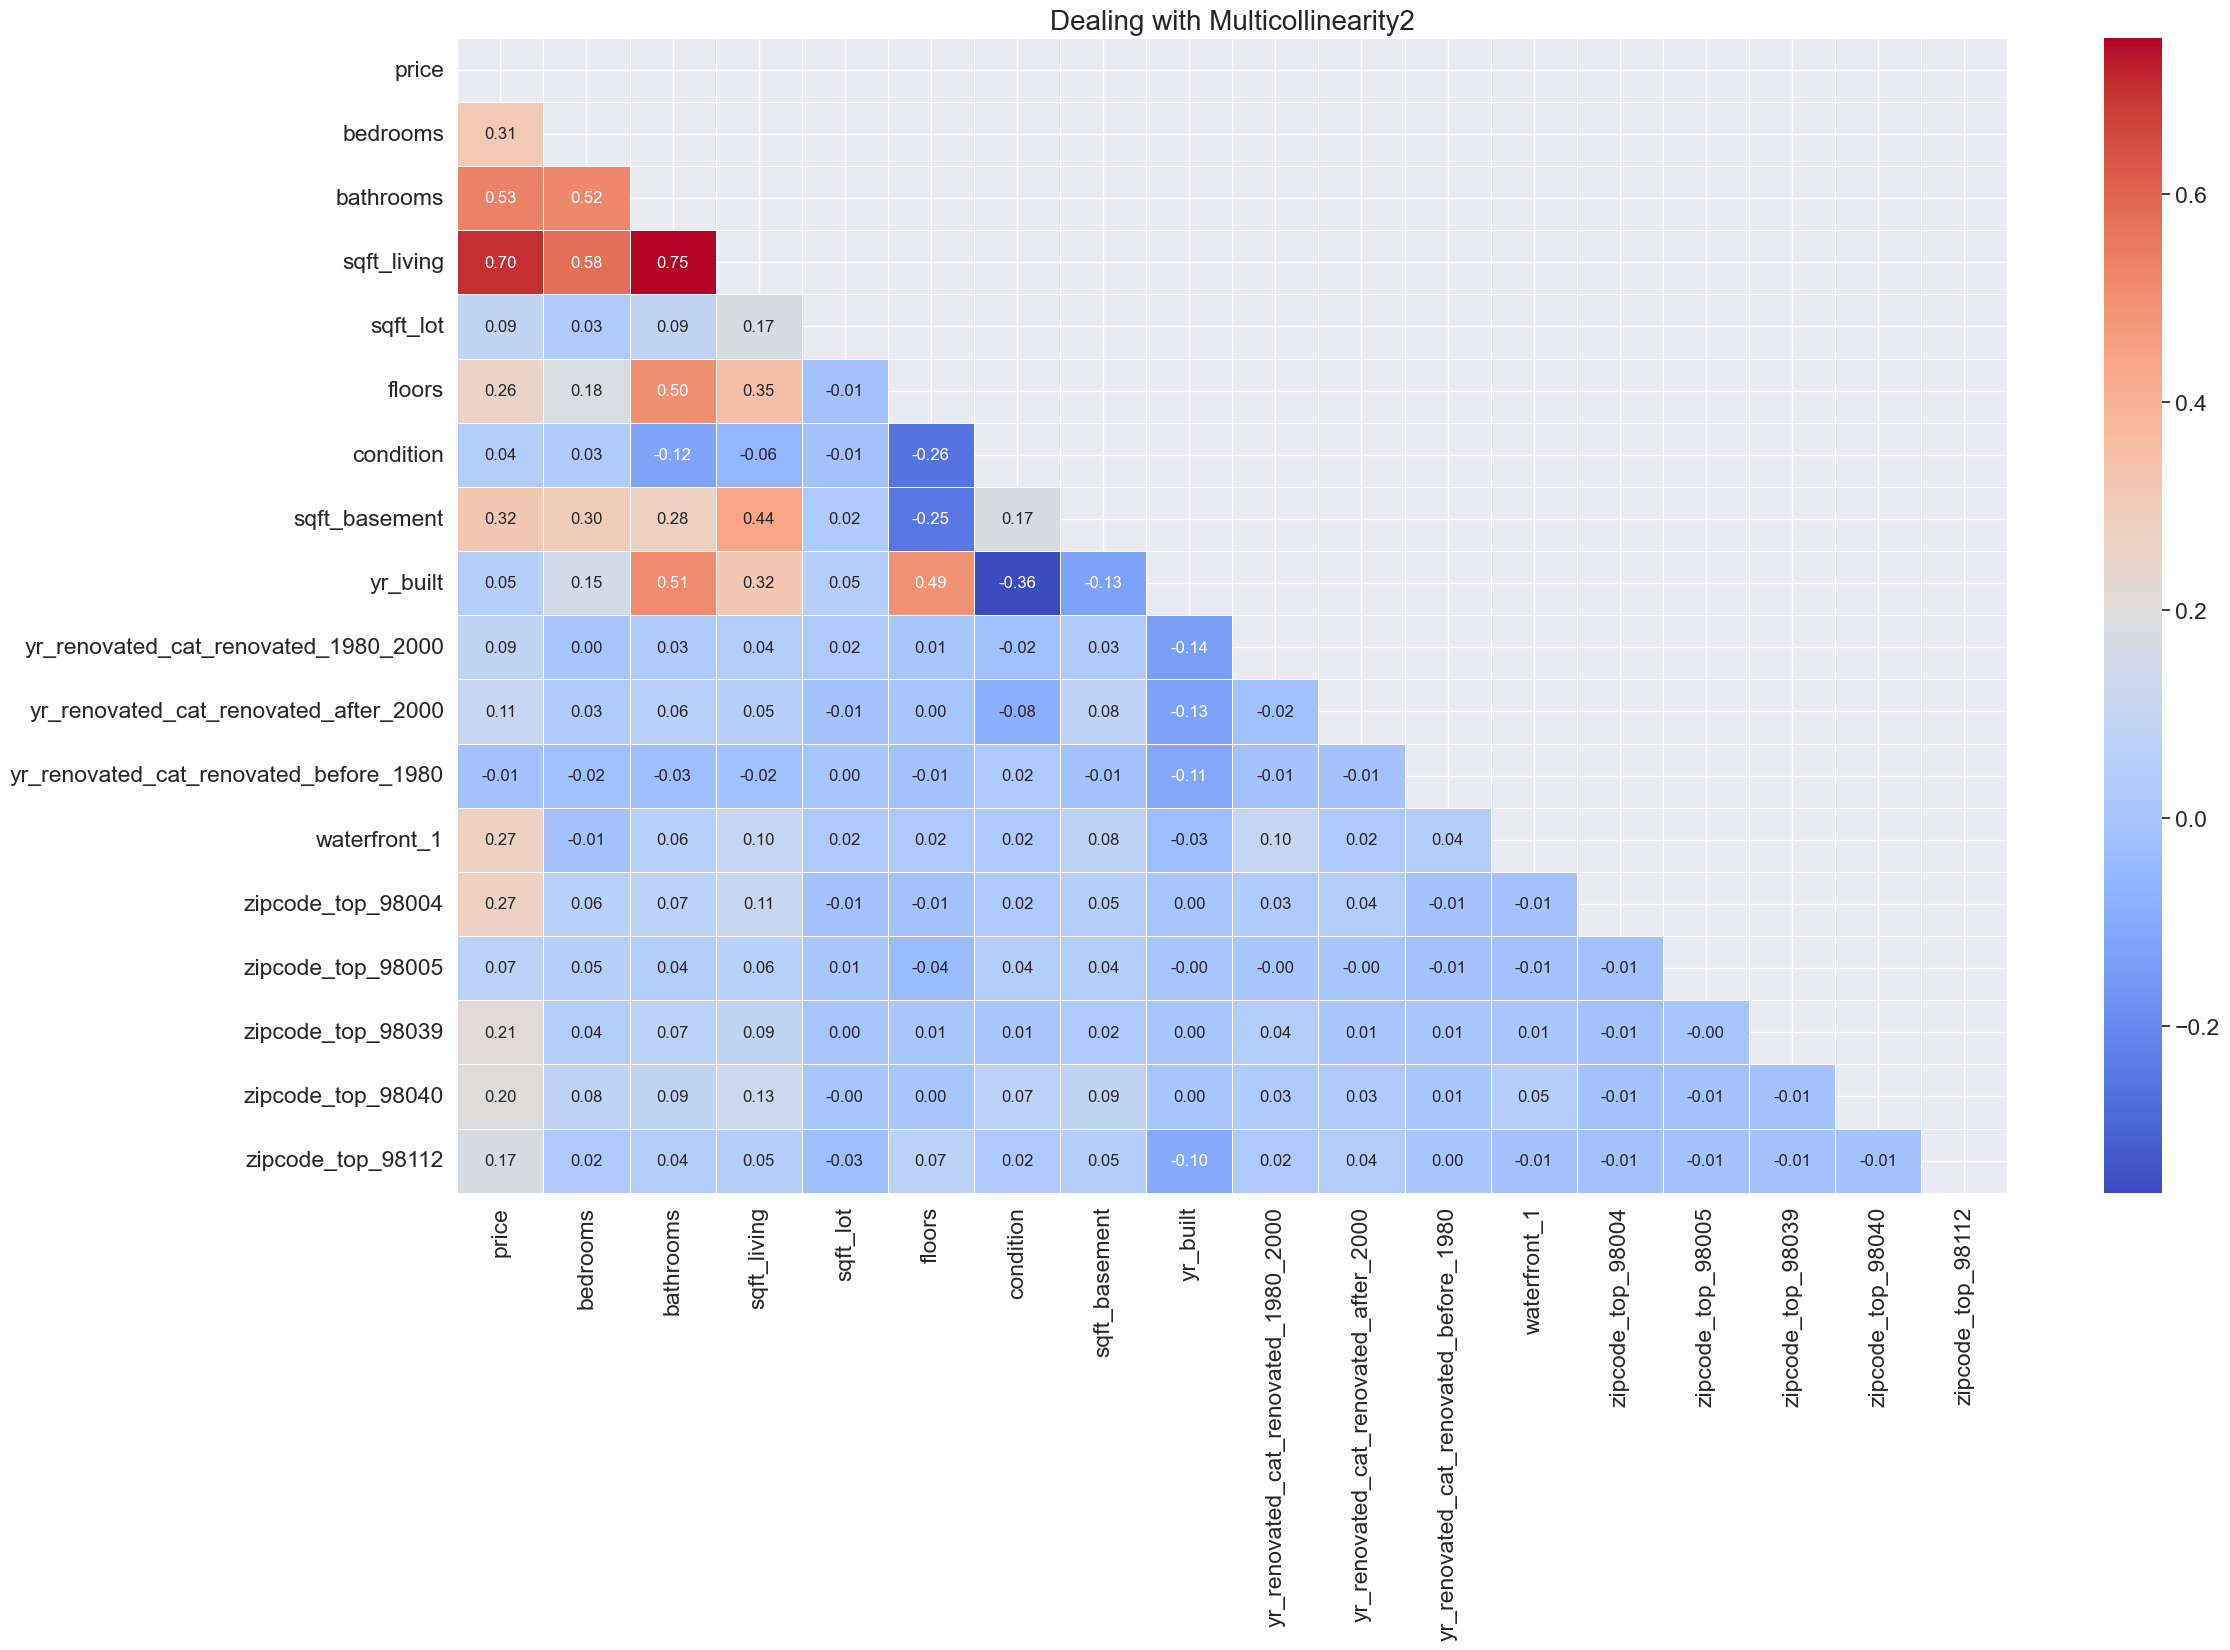

In [55]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr5)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr5, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity2", fontsize=20) # add title
plt.show()

In [83]:
y = df_dummied['price']
X = df_dummied.drop(columns=["price"])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([ 841780.2431266 ,  393151.32593209,  397395.35858602, ...,
        399357.82447439,  573203.1958223 , 1657052.70938995])

In [66]:
series_pred = pd.Series(y_pred, name="predictions")
series_y_test = pd.Series(y_test, name="actual")
comparison_df = pd.concat([series_y_test.reset_index(), series_pred], axis=1)
comparison_df.head(300)

,index,actual,predictions
0,9399,879000.00,841780.24
1,18667,526500.00,393151.33
2,9996,262000.00,397395.36
3,10973,595000.00,431890.62
4,3043,430000.00,318119.28
...,...,...,...
295,4050,245000.00,317033.08
296,19703,319900.00,530688.67
297,21213,785000.00,1157776.65
298,8728,625000.00,999788.80


In [71]:
df.price.mean()

540106.7134724858

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6826244406286531

In [106]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2  = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test,  y_pred, squared=False)
MSE = mean_squared_error(y_test,  y_pred)
MAE = mean_absolute_error(y_test,  y_pred)

In [107]:
#Printing the results
print("R2 = ", round(r2 , 4))
print("RMSE = ", round(RMSE , 4))
print("MSE =  ", round(MSE , 4)) 
print("MAE = ", round(MAE , 4))

R2 =  0.6826
RMSE =  216640.0713
MSE =   46932920498.7103
MAE =  143687.0092


In [73]:
import xgboost as xgb
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [76]:
predictions_xgb = xgbr.predict(X_test)

In [103]:
r2_x = r2_score(y_test, predictions_xgb)
RMSE_x = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_x = mean_squared_error(y_test, predictions_xgb)
MAE_x = mean_absolute_error(y_test, predictions_xgb)

In [104]:
print("R2 = ", round(r2_x, 4))
print("RMSE = ", round(RMSE_x, 4))
print("The value of the metric MSE is ", round(MSE_x, 4))
print("MAE = ", round(MAE_x, 4))

R2 =  0.6712
RMSE =  220511.8544
The value of the metric MSE is  48625477945.6938
MAE =  143369.2679


In [80]:
df_high = df_dummied[df_dummied['price']>600000]

In [81]:
len(df_high)

6256

In [108]:
num_corrh= round(df_high.corr(), 2)

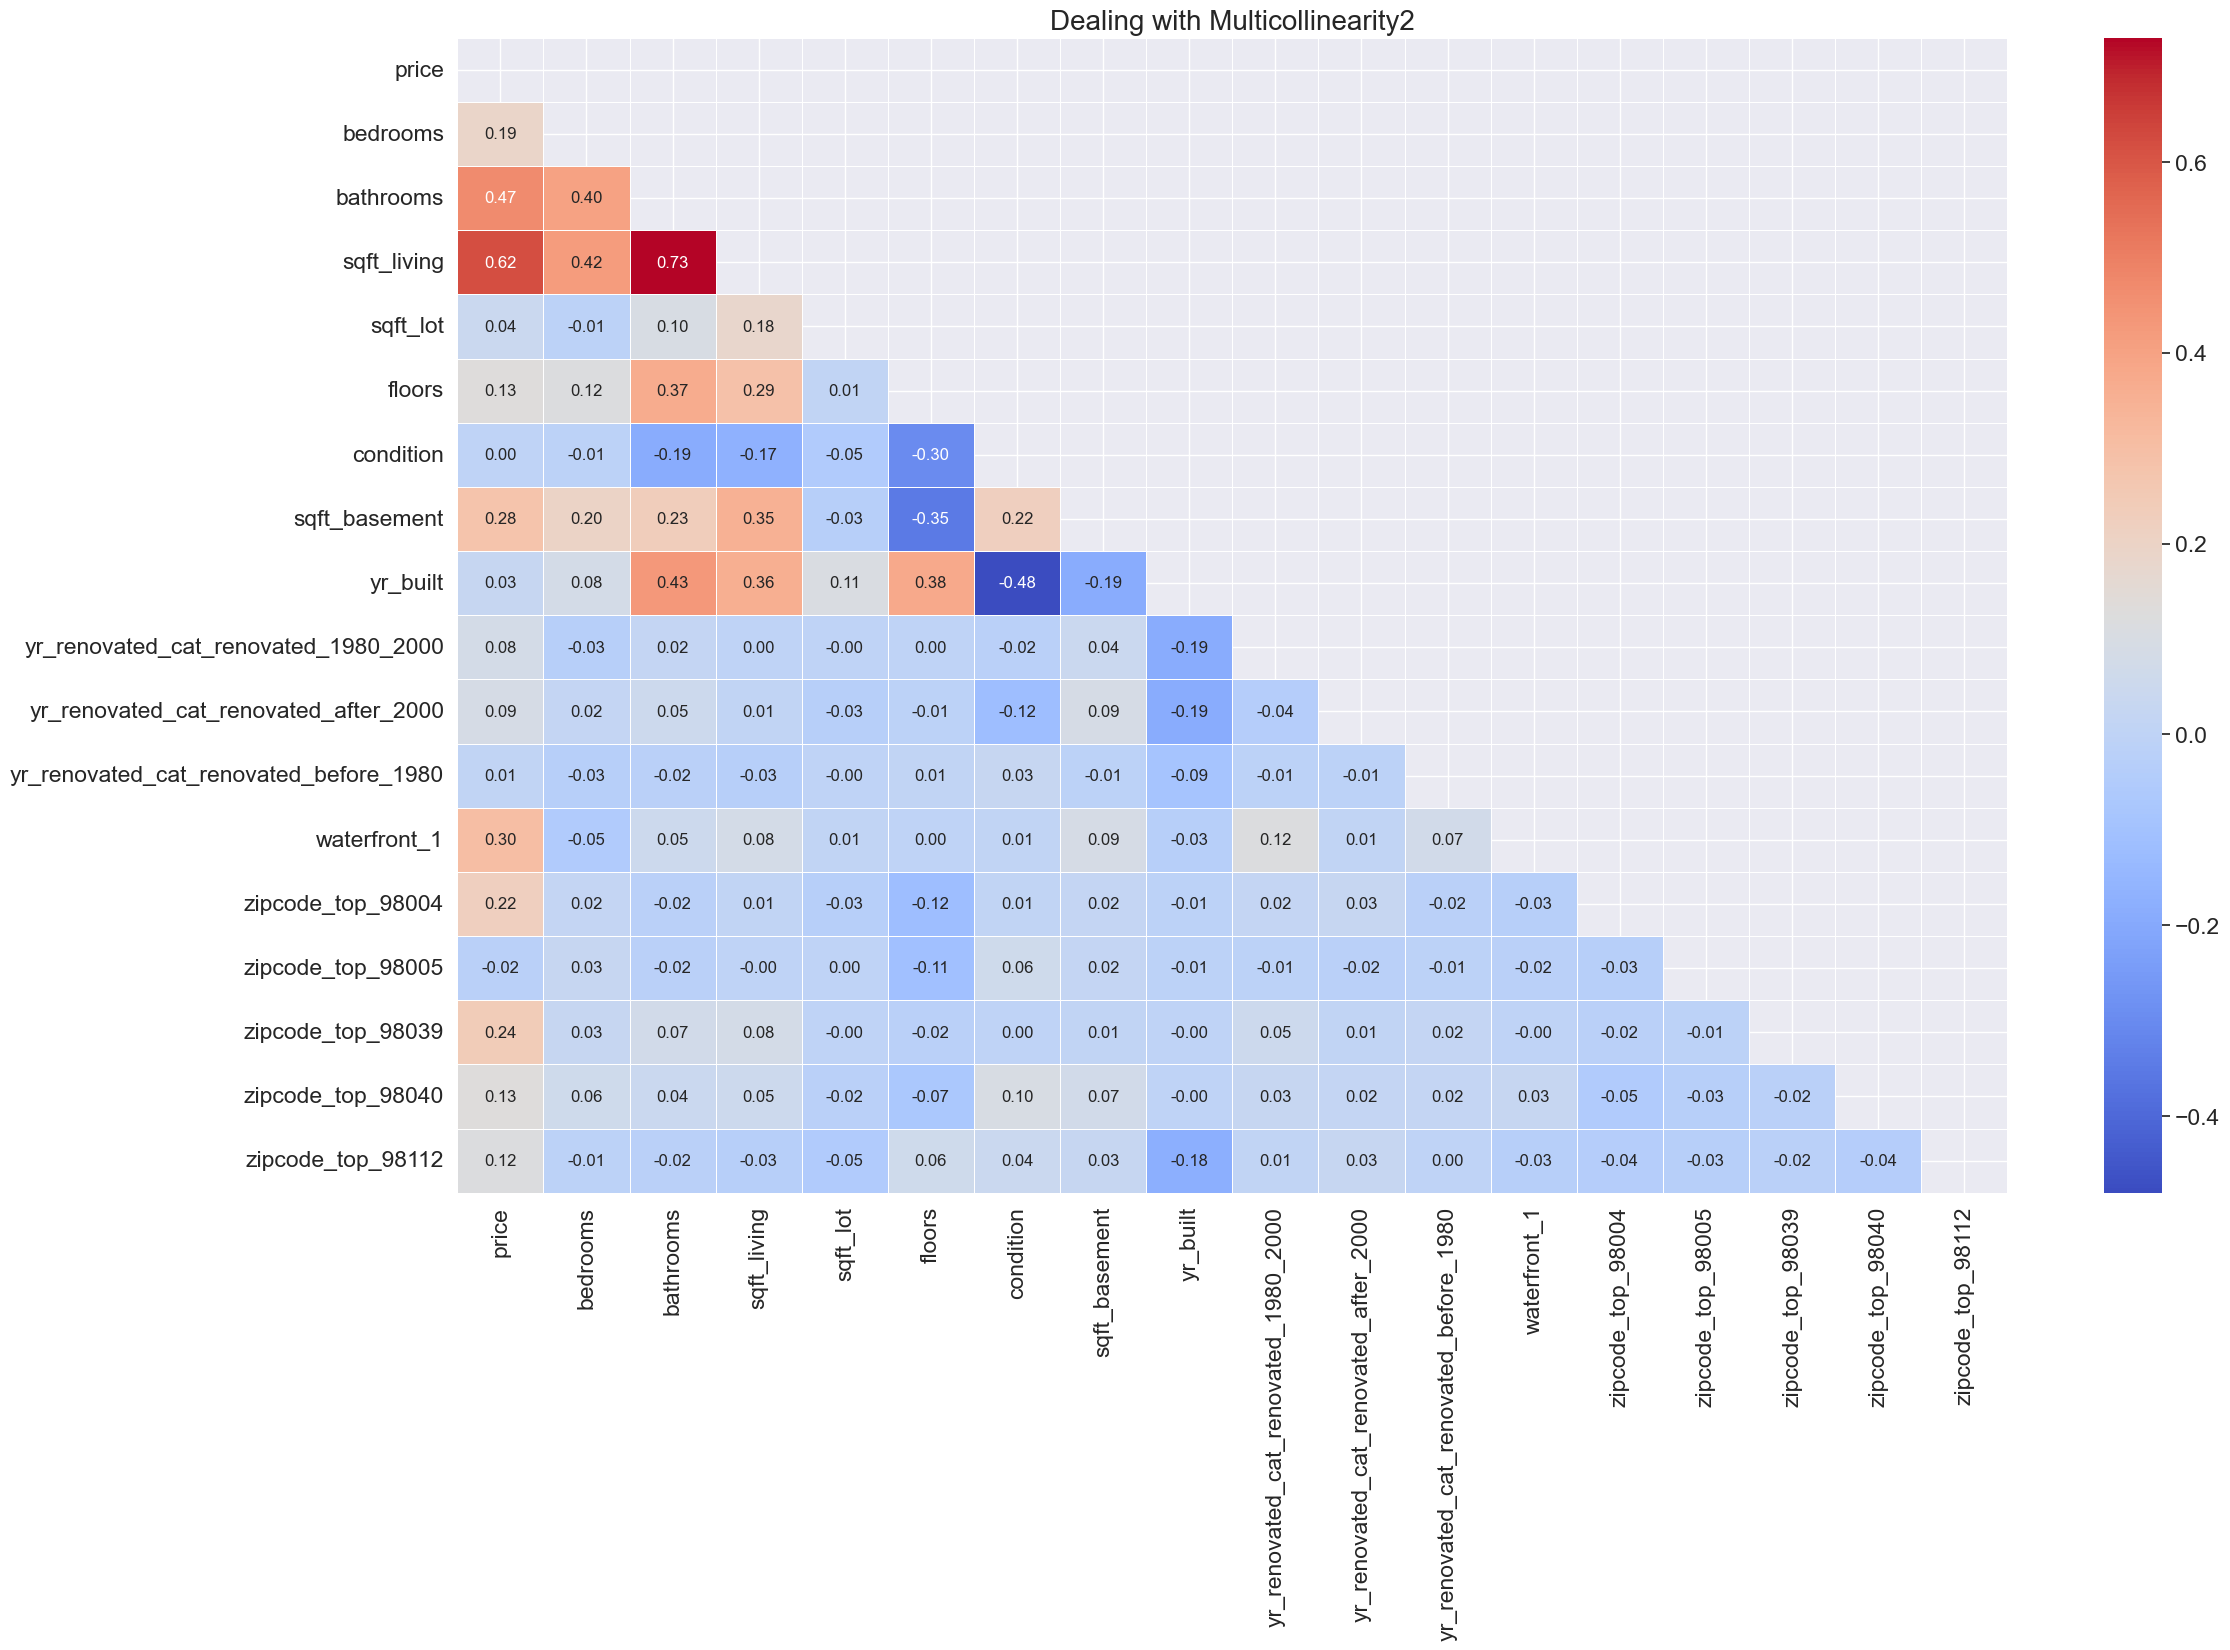

In [109]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corrh)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corrh, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity2", fontsize=20) # add title
plt.show()

In [84]:
y_h = df_high['price']
X_h = df_high.drop(columns=["price"])

In [85]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.3, random_state=42)

In [90]:
model_h = LinearRegression()
model_h.fit(X_train_h, y_train_h)

LinearRegression()

In [91]:
y_pred_h = model_h.predict(X_test_h)

In [100]:
r2_h = r2_score(y_test_h, y_pred_h)
RMSE_h = mean_squared_error(y_test_h, y_pred_h, squared=False)
MSE_h = mean_squared_error(y_test_h, y_pred_h)
MAE_h = mean_absolute_error(y_test_h, y_pred_h)

In [101]:
print("R2 = ", round(r2_h, 4))
print("RMSE = ", round(RMSE_h, 4))
print("The value of the metric MSE is ", round(MSE_h, 4))
print("MAE = ", round(MAE_h, 4))

R2 =  0.6166
RMSE =  283628.4007
The value of the metric MSE is  80445069711.7073
MAE =  186895.2678


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

r2_n = r2_score(y_test, predictions_xgb_2)
RMSE_n = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_n = mean_squared_error(y_test, predictions_xgb_2)
MAE_n = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_n, 4))
print("RMSE = ", round(RMSE_n, 4))
print("The value of the metric MSE is ", round(MSE_n, 4))
print("MAE = ", round(MAE_n, 4))

R2 =  0.6712
RMSE =  220511.8544
The value of the metric MSE is  48625477945.6938
MAE =  143369.2679
